# EDA

In [32]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [35]:
# Import csv file for EDA analysis
df_list = pd.read_csv('./data/halal_non_halal_ingred.csv')

In [3]:
df_list.head()

,ingred_name,chem_name,description,halal_non_halal_doubtful
0,e100,Curcumin (C.I. 75300),Colouring,0.0
1,e101,Riboflavin/Lactofavin/Vitamin B2 *,Colouring/ \nVitamin,2.0
2,e102,Tartrazine/FD&C Yellow 5 (C.I. 19140),Colouring,0.0
3,e104,Quinoline Yellow (C.I. 47005),Colouring,0.0
4,e107,Yellow 2G (C.I. 18965),Colouring,0.0


In [4]:
# Count the occurrences of 0 (Halal), 1 (Non-Halal), 2 (Doubtful) in the original data
halal_status_counts_original = df_list['halal_non_halal_doubtful'].value_counts()

# Print the counts
print(halal_status_counts_original)

0.0    610
2.0    232
1.0     40
Name: halal_non_halal_doubtful, dtype: int64


This indicates that most ingredients are classified as halal, followed by a significant number of doubtful cases, and a smaller number of non-halal ingredients.

In [5]:
# Remove rows with missing 'description' values
list_cleaned = df_list.dropna(subset=['description'])

# Count the occurrences of 0 (Halal), 1 (Non-Halal), 2 (Doubtful) in the cleaned data
description_count = list_cleaned['halal_non_halal_doubtful'].value_counts()
print(description_count)

0.0    281
2.0    135
1.0      1
Name: halal_non_halal_doubtful, dtype: int64


After removing the rows with no descriptions, most ingredients are classified as halal, followed by a significant number of doubtful cases, and a smaller number of non-halal ingredients.

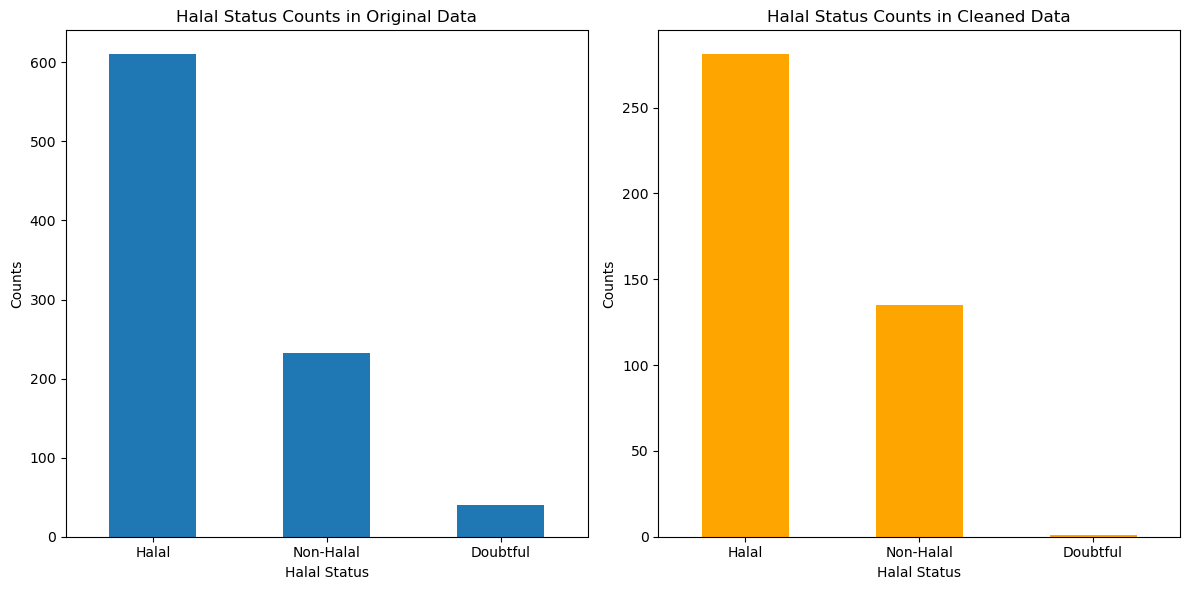

In [6]:
# Plotting the data
plt.figure(figsize=(12, 6))

# Plot for original data
plt.subplot(1, 2, 1)
halal_status_counts_original.plot(kind='bar')
plt.title('Halal Status Counts in Original Data')
plt.xlabel('Halal Status')
plt.ylabel('Counts')
plt.xticks(ticks=[0, 1, 2], labels=['Halal', 'Non-Halal', 'Doubtful'], rotation=0)

# Plot for cleaned data
plt.subplot(1, 2, 2)
description_count.plot(kind='bar', color='orange')
plt.title('Halal Status Counts in Cleaned Data')
plt.xlabel('Halal Status')
plt.ylabel('Counts')
plt.xticks(ticks=[0, 1, 2], labels=['Halal', 'Non-Halal', 'Doubtful'], rotation=0)

plt.tight_layout()
plt.show()

- The first graph displays the counts of halal, non-halal, and doubtful statuses in the original dataset.
- The second graph shows these counts in the dataset after removing rows with missing descriptions.

Both graph depicts that this list of ingredients has more counts of halal ingredients compared to non-halal or doubtful

## Identifying the Most Common Descriptions in the Ingredient List

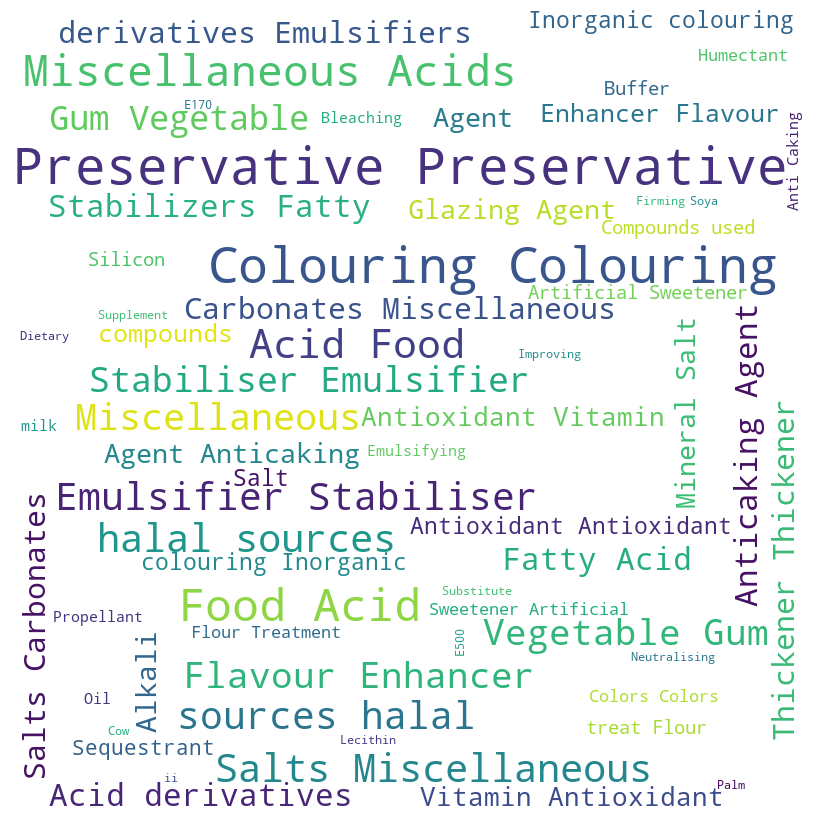

In [7]:
# Assuming 'list_cleaned' is the DataFrame with cleaned data
description = list_cleaned['description']

# Combine all descriptions into a single string
all_descriptions = ' '.join(description)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_descriptions)

# Plotting the WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Based on the word cloud above, 

- Colouring and Preservatives: These being the most prominent words suggest a high frequency of coloring agents and preservatives in the ingredients. This is typical in many food products where color stability and shelf life are important.

- Emulsifier, Stabiliser, Food Acid, Miscellaneous: The notable presence of these terms indicates they are also common but to a lesser extent than colouring and preservatives. These terms are indicative of ingredients used for texture, consistency, and flavor preservation in food products.

## Distribution of Halal Statuses Across Ingredient Descriptions

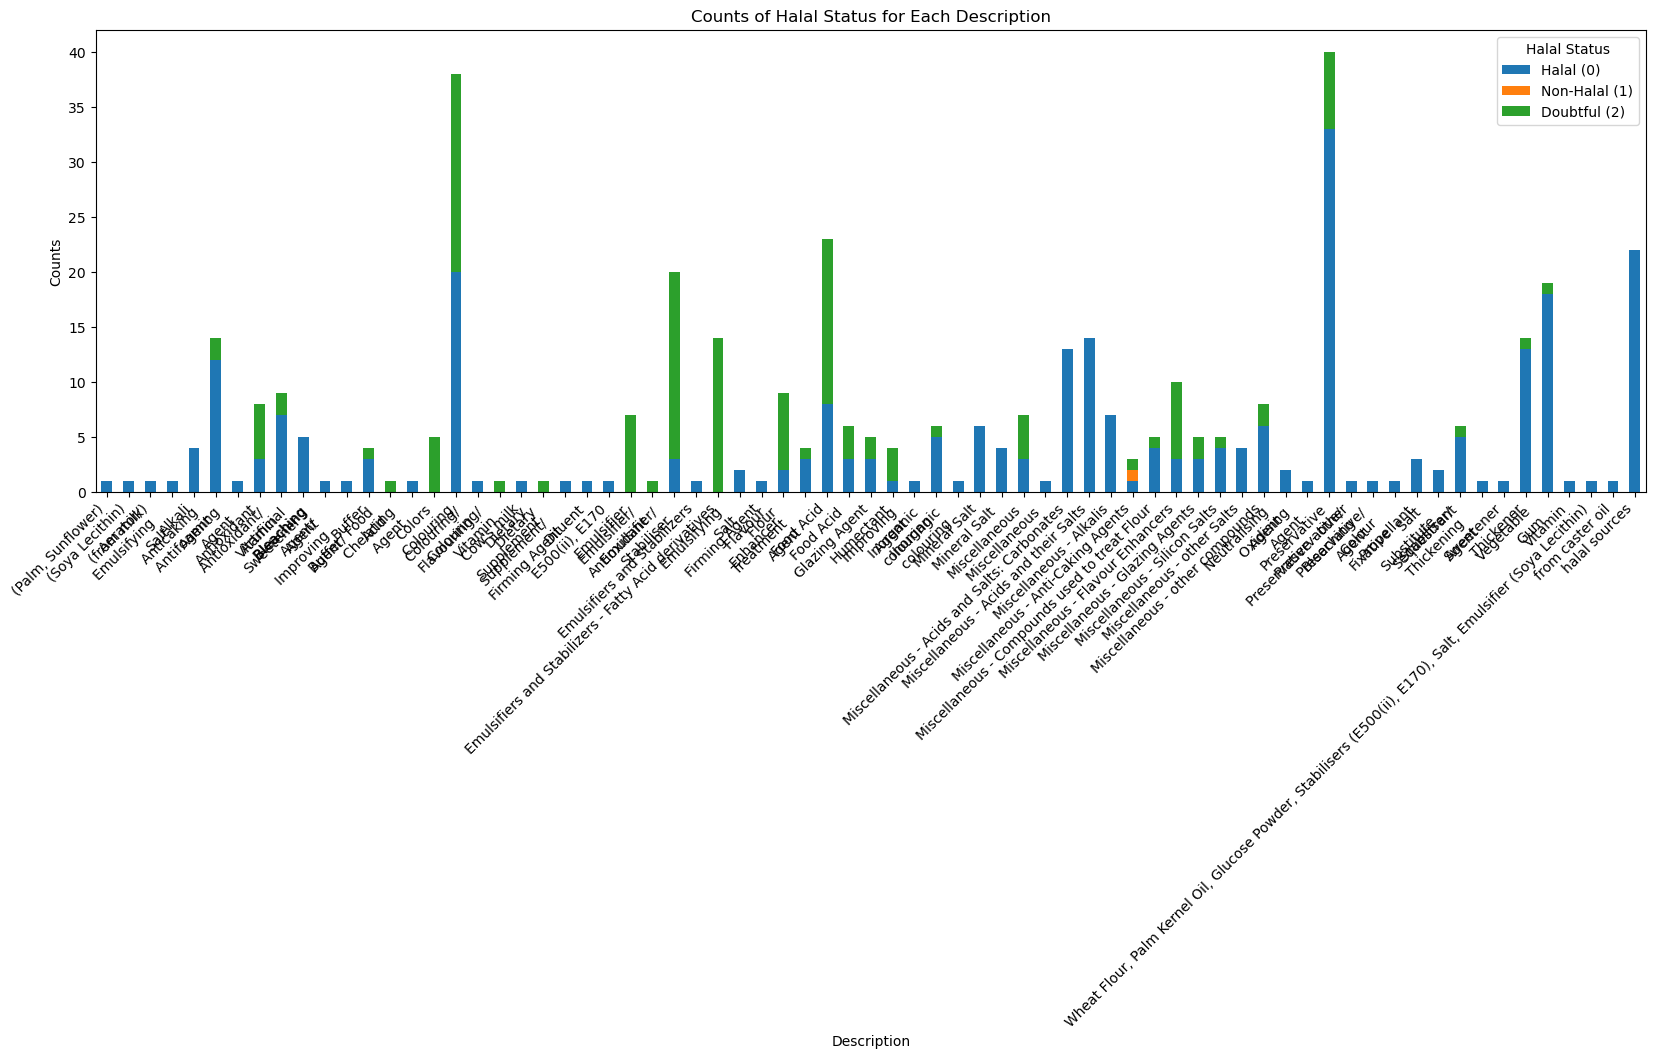

In [27]:
# Grouping by 'description' and 'halal_non_halal_doubtful' to count occurrences of 0, 1, and 2 for each description
description_counts = list_cleaned.groupby(['description', 'halal_non_halal_doubtful']).size().unstack(fill_value=0)

# Plotting the data
description_counts.plot(kind='bar', stacked=True, figsize=(20, 6))
plt.title('Counts of Halal Status for Each Description')
plt.xlabel('Description')
plt.ylabel('Counts')
plt.legend(title='Halal Status', labels=['Halal (0)', 'Non-Halal (1)', 'Doubtful (2)'])
plt.xticks(rotation=45, ha='right')
plt.show()

## Breaking down the graph into sections with lower value counts for enhanced clarity and visibility.

In [18]:
# Grouping by 'description' and 'halal_non_halal_doubtful' to count occurrences of 0, 1, and 2 for each description
description_counts = list_cleaned.groupby(['description', 'halal_non_halal_doubtful']).size().unstack(fill_value=0)

# Summing up the counts for each description
total_counts = description_counts.sum(axis=1)

# Dividing the dataset based on total counts
less_than_5 = description_counts[total_counts < 5]
between_5_and_10 = description_counts[(total_counts >= 5) & (total_counts <= 10)]
more_than_10 = description_counts[total_counts > 10]

### Descriptions with Total Counts Less Than 1.5 value counts

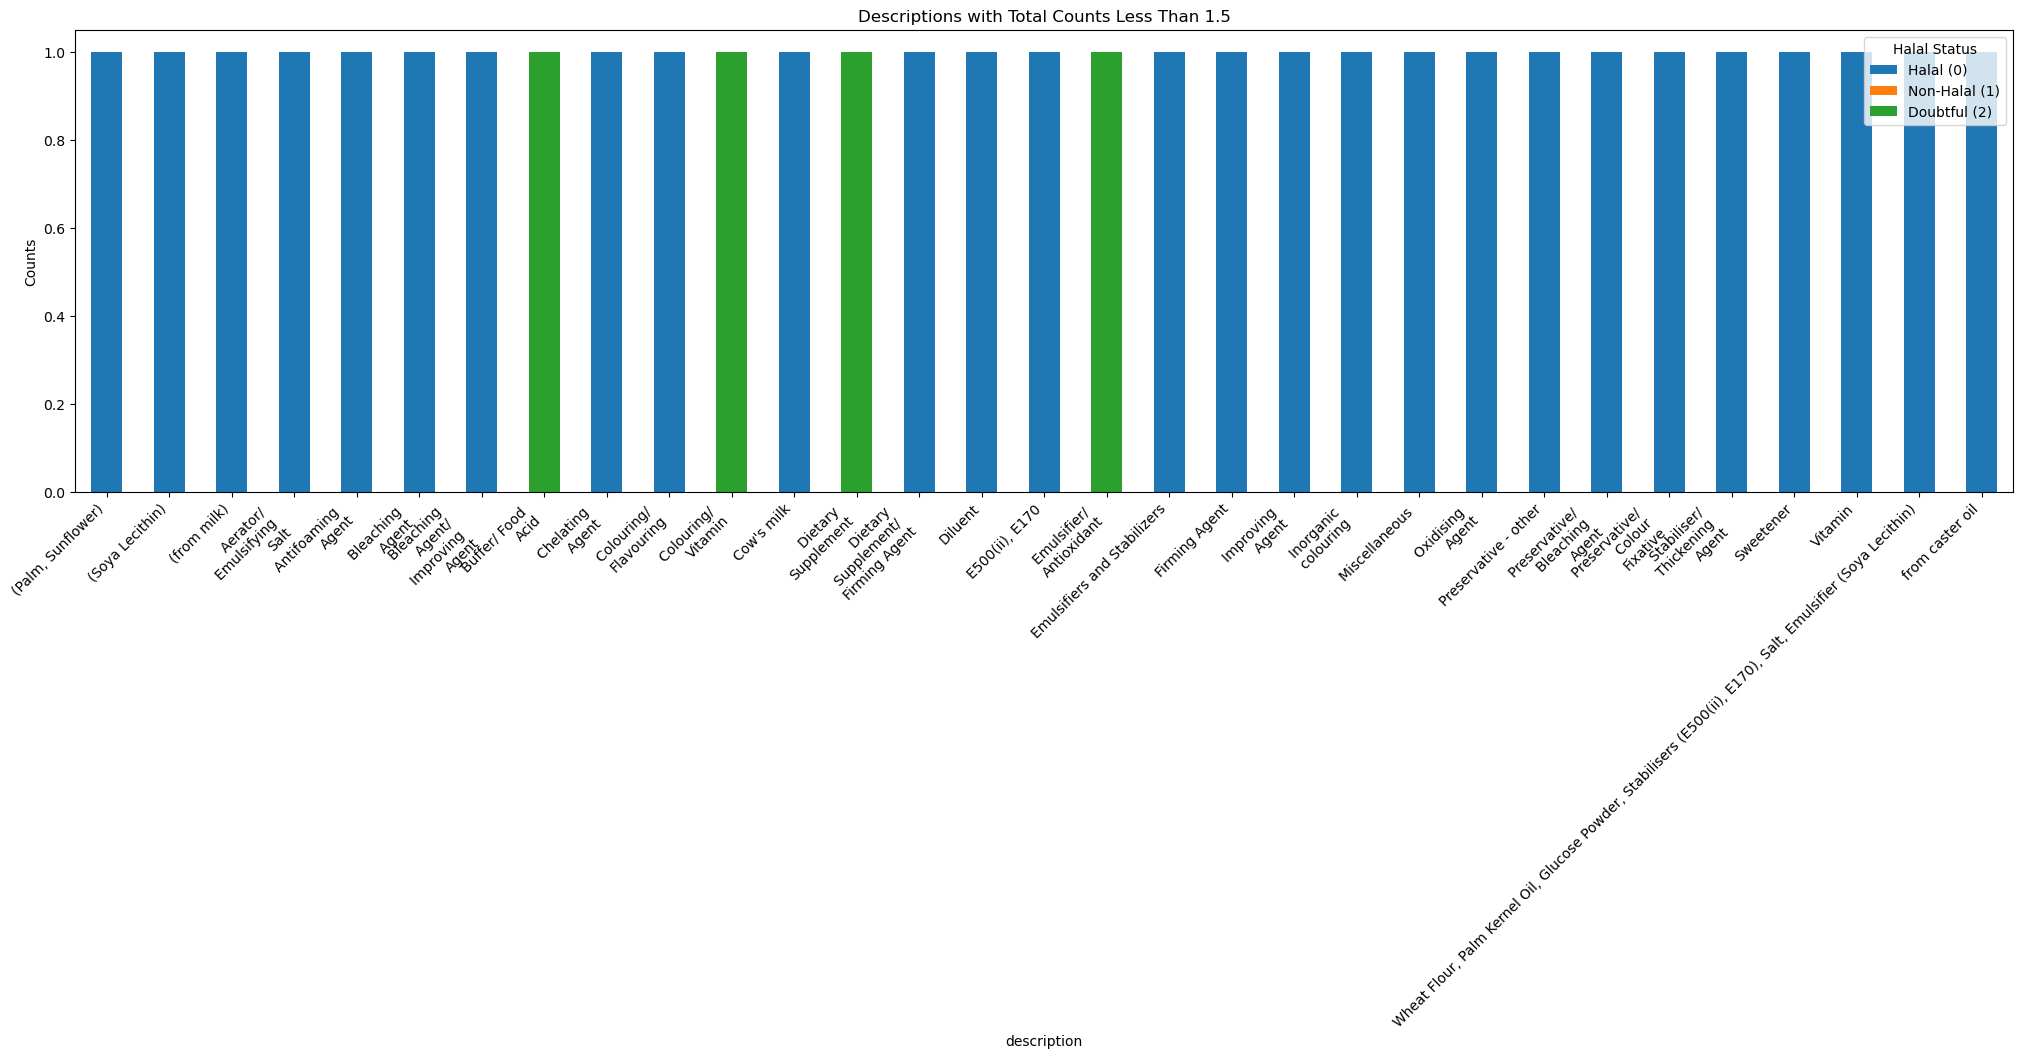

In [26]:
below_1_5 = description_counts[total_counts < 1.5]

below_1_5.plot(kind='bar', stacked=True, figsize=(25, 6))
plt.title('Descriptions with Total Counts Less Than 1.5')
plt.ylabel('Counts')
plt.legend(title='Halal Status', labels=['Halal (0)', 'Non-Halal (1)', 'Doubtful (2)'])
plt.xticks(rotation=45, ha='right')
plt.show()

### Descriptions with Total Counts Between 1.5 and 5

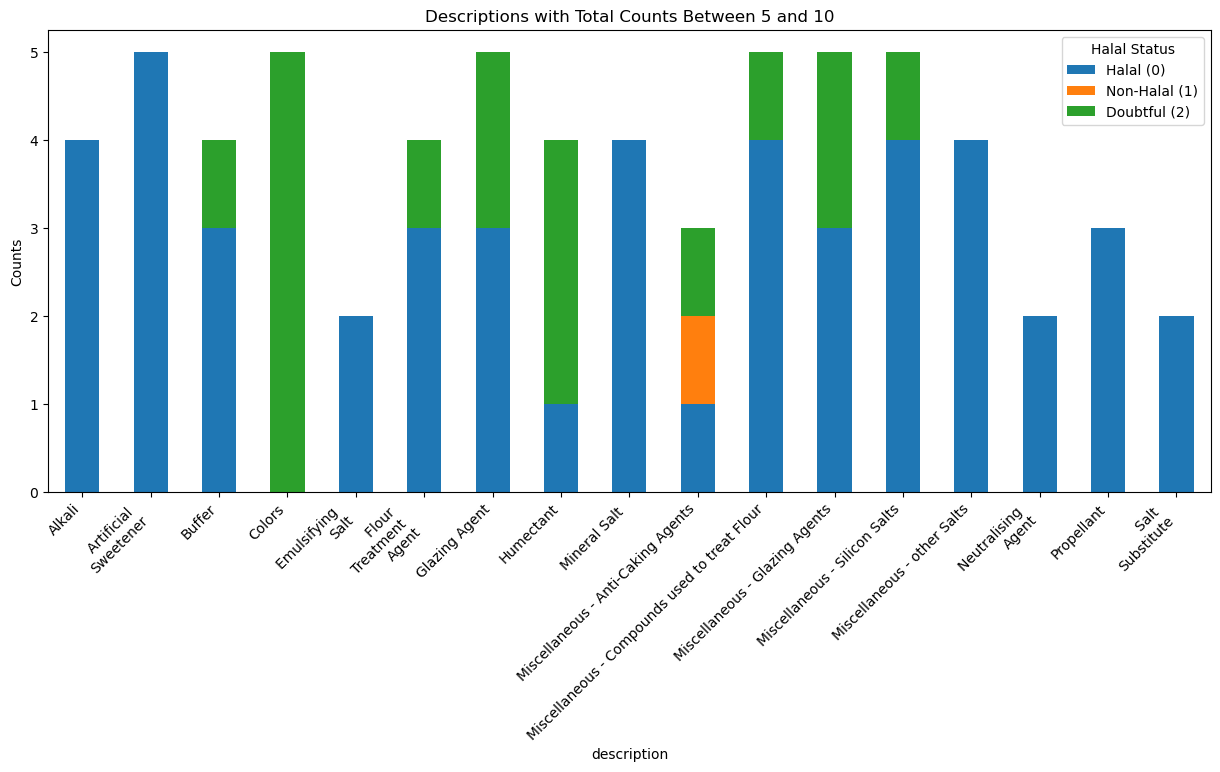

In [25]:
between_1_and_5 = description_counts[(total_counts >= 1.5) & (total_counts <= 5)]

between_1_and_5.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Descriptions with Total Counts Between 5 and 10')
plt.ylabel('Counts')
plt.legend(title='Halal Status', labels=['Halal (0)', 'Non-Halal (1)', 'Doubtful (2)'])
plt.xticks(rotation=45, ha='right')
plt.show()

### Descriptions with Total Counts Between 5 and 10:

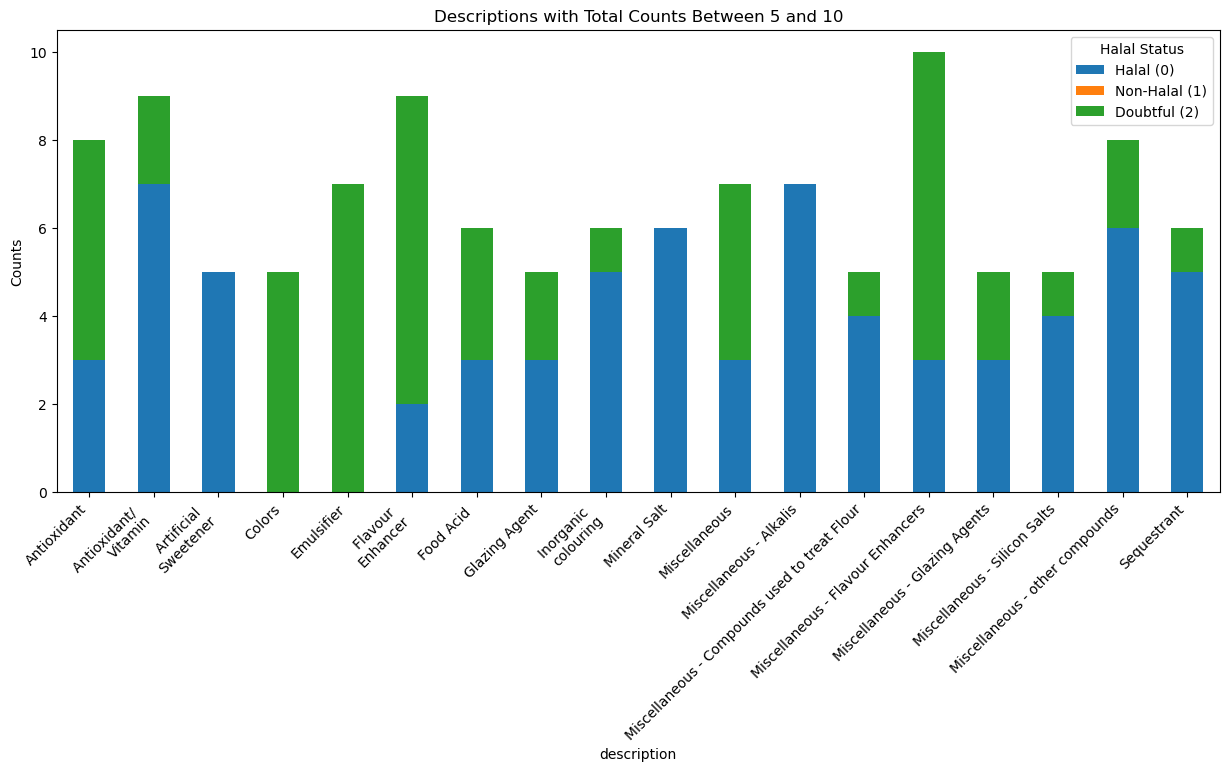

In [24]:
between_5_and_10.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Descriptions with Total Counts Between 5 and 10')
plt.ylabel('Counts')
plt.legend(title='Halal Status', labels=['Halal (0)', 'Non-Halal (1)', 'Doubtful (2)'])
plt.xticks(rotation=45, ha='right')
plt.show()

### Descriptions with Total Counts More Than 10:

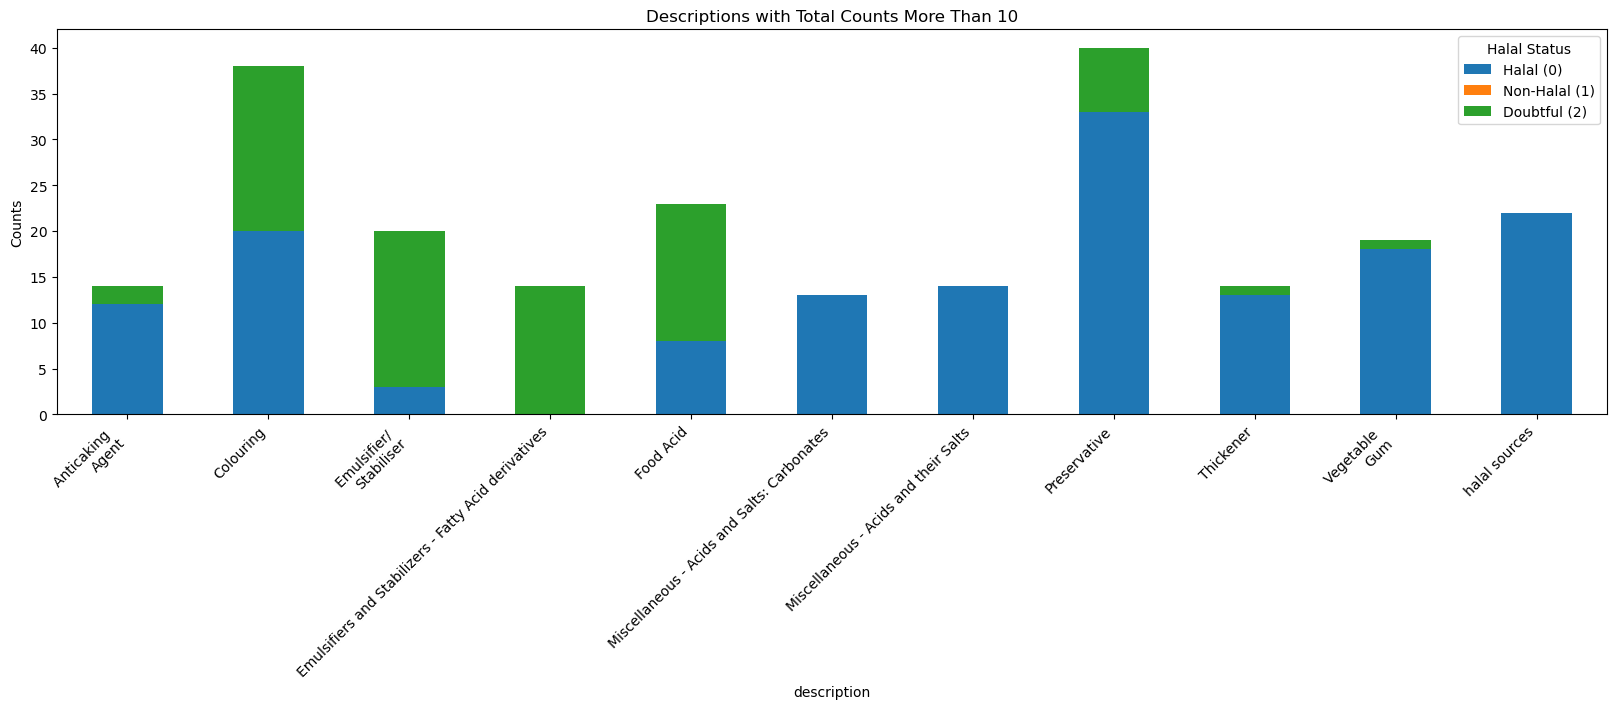

In [23]:
more_than_10.plot(kind='bar', stacked=True, figsize=(20, 5))
plt.title('Descriptions with Total Counts More Than 10')
plt.ylabel('Counts')
plt.legend(title='Halal Status', labels=['Halal (0)', 'Non-Halal (1)', 'Doubtful (2)'])
plt.xticks(rotation=45, ha='right')
plt.show()

From all the graphs,

- We can conclude that in this ingredient list, Emulsifiers and Stabilizers 
- Fatty Acid derivatives are mostly doubtful
- Most Emulsifiers and Colouring/Colour are also doubtful 


In [29]:
# Extracting rows with missing descriptions
na_rows = df_list[df_list['description'].isna()]

# Counting the occurrences of 0 (Halal), 1 (Non-Halal), 2 (Doubtful) in rows with missing descriptions
na_halal_status_counts = na_rows['halal_non_halal_doubtful'].value_counts()

print(na_halal_status_counts)

0.0    329
2.0     97
1.0     39
Name: halal_non_halal_doubtful, dtype: int64


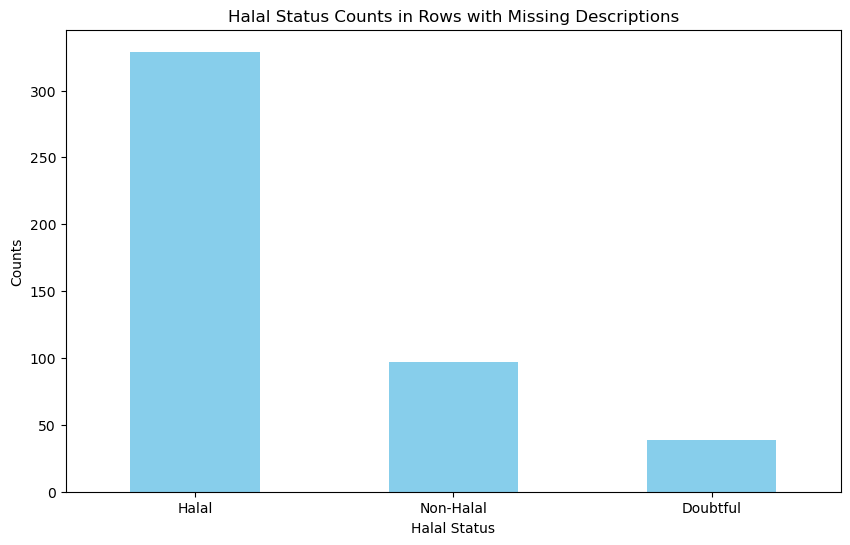

In [30]:

# Plotting the halal status counts for rows with missing descriptions
na_halal_status_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Halal Status Counts in Rows with Missing Descriptions')
plt.xlabel('Halal Status')
plt.ylabel('Counts')
plt.xticks(ticks=[0, 1, 2], labels=['Halal', 'Non-Halal', 'Doubtful'], rotation=0)
plt.show()


The bar graph above visualizes the counts of halal, non-halal, and doubtful statuses in the rows where descriptions are missing from your dataset. Each bar represents one of the statuses, allowing you to easily see the distribution of these categories among the rows with missing descriptions.

## Insights

- The majority of the ingredients in the list is halal followed by non halal then doubtful
- The majority of the ingredients with descriptions that are doubtful are:
    - Emulsifiers,  
    - Fatty Acid derivative
    - Colouring/Colour
    - Stabilizers

![Food Preparation](https://www.muis.gov.sg/-/media/Project/Halal/Content-Images/Picture1.ashx?h=379&w=600&hash=1FD61BEF4F12F2F6FD387E271AB35E1B)

**Check for Halal Certification/Logo**

- Initially, look for a halal certification or logo on the food packaging.
- If present, the food product is halal and safe to consume.
- Inspecting Ingredients in the Absence of Certification

**If there's no halal certification/logo, review the ingredients list on the package.**

- If all ingredients are halal, the product is likely halal for consumption.
- Consideration of Manufacturing Processes

Sometimes, even if ingredients are halal, the product may be processed in a facility that also handles non-halal items. In such cases, the halal status becomes doubtful.
Analyzing Specific Ingredients

**Certain ingredients might have varied sources.**

- For example:
    - If whey powder is explicitly derived from milk, it is likely halal.
    - However, if the source of whey powder is not specified, its halal status is doubtful.
    - In such situations, it is advisable to contact the manufacturer for clarity on any use of animal by-products.
    
**Vegan Food**

- Generally, vegan food is considered halal.
- However, it's still recommended to verify the ingredients on the packaging before purchasing or consuming.

Ultimately, the halal status of food products hinges on two key factors: the source of the ingredients and the methods of production. Understanding where and how ingredients are sourced and processed is crucial in determining their suitability for halal consumption.
